<a href="https://colab.research.google.com/github/RaivoKasepuu/BDA_Tartu_MTAT_03_319/blob/master/BDA_lab03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="alert alert-block alert-info"><b></b>
<h1><center> <font color='black'>  Business Data Analytics - Practice Session_03  </font></center></h1>
<h2><center> <font color='black'> Customer Segmentation</font></center></h3>
<h2><center> <font color='black'> University of Tartu</font></center></h3>
</div>

## What is Customer Segmentation (Clustering)?

* **Customer segmentation** is a method of dividing customers into groups or clusters on the basis of common characteristics `(what characteristics?)`. 
    1. `Customer's demographic characteristics` such as occupation, gender, age, location, and marital status.
    2.  `Psychographic characteristics` such as social class, lifestyle and personality characteristics and behavioral characteristics such as spending, consumption habits, product/service usage, and previously purchased products.
    3. Using various `company's characteristics` such as the size of the company, type of industry, and location.

## Today's practice session:

* Today practice session is about customer segmentation, which has become an essential part of marketing. During the lecture we discussed different ways of data segmentation. During the practice we will deal with the:
    1. **RFM model**     
    2. `Automatic segmentation` discovery via `kmeans` and `hierarchical` clustering.

## What are the steps?
<img src="https://www.linkpicture.com/q/flow_chart_full_1.png">



### Lets install the packages
<img src = "https://www.linkpicture.com/q/1_230.png">

In [ ]:
#import modules
import numpy as np # for arrays
import pandas as pd # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
import datetime as dt # for date data type

plt.style.use("ggplot")

## RFM

1. RFM stands for `Recency (no of inactive customers)` - `Frequency` - `Monetary (revenue)` Value. Theoretically we will have **segments - clusters** like below:

    * **Low Value:** Customers who are less active than others `(low recency)`, not very frequent buyer/visitor and generates very low `(low frequency)` - zero - maybe negative revenue `(low revenue)`.
    * **Mid Value:** In the middle of everything. Often using our platform (but not as much as our High Values), fairly frequent and generates moderate revenue.
    * **High Value:** `The group we don’t want to lose`. High Revenue, Frequency and low Inactivity.

### Lets get the data and perform Descriptive analysis to understand it.
<img src = "https://www.linkpicture.com/q/2_278.png">

In [ ]:
df = pd.read_csv("Clients-and-Order.csv")
df.head()

,order_id,product,client_id,order_date,money_spent
0,1,a,473,4/2/2017,14.80
1,1,b,473,4/2/2017,112.47
2,1,c,473,4/2/2017,235.69
3,1,b,473,4/2/2017,28.38
4,2,a,282,2/17/2017,8.36


To perform RFM analysis we now need to calculate three measures:
* **R** - recency score
* **F** - frequency score
* **M** - monetary score

In our case recency will be expressed as number of days since the last order, frequency will be defined as the number of purchased items, and monetary score is the total amount spent during the defined period. 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4378 entries, 0 to 4377
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   order_id     4378 non-null   int64  
 1   product      4378 non-null   object 
 2   client_id    4378 non-null   int64  
 3   order_date   4378 non-null   object 
 4   money_spent  4378 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 171.1+ KB


Please, note that we have a column order_date there that is of a type datetime, however, we can see that it is of a type object. Let's convert it to date format:

In [ ]:
# transform to date format
df.order_date = pd.to_datetime(df.order_date)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4378 entries, 0 to 4377
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   order_id     4378 non-null   int64         
 1   product      4378 non-null   object        
 2   client_id    4378 non-null   int64         
 3   order_date   4378 non-null   datetime64[ns]
 4   money_spent  4378 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 171.1+ KB


We will use all of the data by defining the reporting date as the last recorded purchase:

In [ ]:
reporting_date = df.order_date.max()
reporting_date

Timestamp('2017-04-11 00:00:00')

### Really simple and short descriptive Analysis

* Number of unique clients

In [ ]:
df.client_id.nunique()

457

* Types of products

## Ex 1: 

Plot the counts of each type of product using bar plot.

In [ ]:
# your code goes here
?

### Lets calculate RFM
<img src="https://www.linkpicture.com/q/3_126.png">

We will calcualte the frequency, recency and monetary values in the following way:
* Recency: Calculate the number of days between present date and date of last purchase for each customer
* Frequency: Calculate the number of orders for each customer
* Monetary: Calculate sum of purchase price for each customer

In [ ]:
# we will use lambda functions for this purpose
# crate another dataframe
rfm = df.groupby('client_id').agg({'order_date': lambda date: int((reporting_date - date.max()).days),
                                   'order_id': lambda num: num.shape[0],
                                   'money_spent': lambda price: price.sum()})

rfm.columns = ['recency', 'frequency', 'monetary']
rfm.head()

,recency,frequency,monetary
client_id,,,
1,37,6,570.40
2,34,7,537.62
3,27,12,1123.90
4,17,11,1755.30
5,8,8,492.74


In [ ]:
rfm.shape

(457, 3)

Let's investigate our results

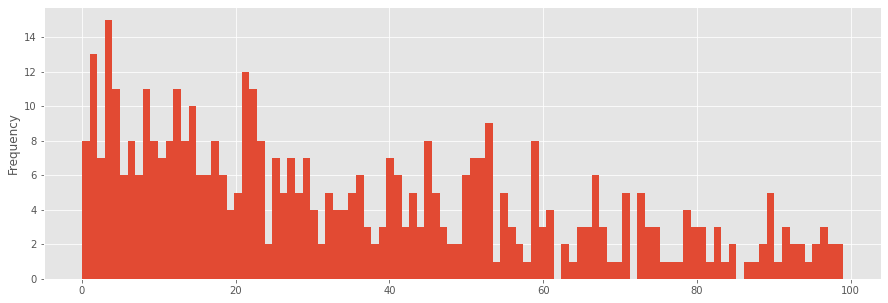

In [ ]:
rfm.recency.plot.hist(bins=100, figsize=(15,5));

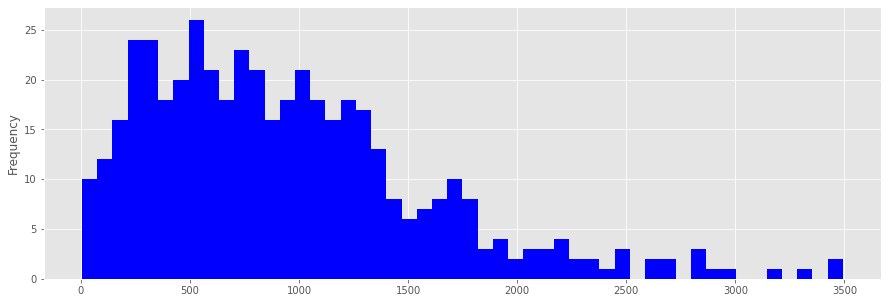

In [ ]:
rfm.monetary.plot.hist(bins=50, figsize=(15,5), color='b');

**Computing Quantile of RFM values**

1. Customers with the `lowest recency`, `highest frequency` and `monetary amounts` considered as top customers.

2. **qcut()** is Quantile-based discretization function. `qcut` bins the data based on sample quantiles. 

In [ ]:
rfm['r_quantile'] = pd.qcut(rfm['recency'], 5, ['1','2','3','4', '5'])
rfm['f_quantile'] = pd.qcut(rfm['frequency'], 5, ['5', '4','3','2','1'])
rfm['m_quantile'] = pd.qcut(rfm['monetary'], 5, ['5', '4','3','2','1'])

rfm.head()

,recency,frequency,monetary,r_quantile,f_quantile,m_quantile
client_id,,,,,,
1,37,6,570.40,3,4,4
2,34,7,537.62,3,4,4
3,27,12,1123.90,3,2,2
4,17,11,1755.30,2,2,1
5,8,8,492.74,1,3,4


In [ ]:
rfm.r_quantile.unique()

['3', '2', '1', '4', '5']
Categories (5, object): ['1' < '2' < '3' < '4' < '5']

**RFM Result Interpretation**

1. Combine all three quartiles(r_quartile,f_quartile,m_quartile) in a single column, this rank will help you to segment the customers well group.

<img src="https://www.linkpicture.com/q/4_241.png">

In [ ]:
rfm['RFM_Score'] = rfm.r_quantile.astype(str)+ rfm.f_quantile.astype(str) + rfm.m_quantile.astype(str)

rfm.head()

,recency,frequency,monetary,r_quantile,f_quantile,m_quantile,RFM_Score
client_id,,,,,,,
1,37,6,570.40,3,4,4,344
2,34,7,537.62,3,4,4,344
3,27,12,1123.90,3,2,2,322
4,17,11,1755.30,2,2,1,221
5,8,8,492.74,1,3,4,134


In [ ]:
# Filter out cusotmers
rfm[rfm['RFM_Score']=='511'].sort_values('monetary', ascending=False)

,recency,frequency,monetary,r_quantile,f_quantile,m_quantile,RFM_Score
client_id,,,,,,,
43,61,17,1994.08,5,1,1,511
487,89,16,1782.57,5,1,1,511
164,73,15,1473.75,5,1,1,511
458,75,16,1391.48,5,1,1,511


The RFM approach is widely used and has a lot of use cases on practice. We can find our best and worst customers, we can decide where to focus our attention, to whom send the campaign and offer discounts. It is clear and reasonably easy to interpret (the only problem is how to visualize the three dimensions simultaniously). However, it requires your attention and highly depends on your choices. It is unlikely you can discover something unexpected. The automatic segmentation is a foray into uncharted territory of your data. Let’s see how it can be done.

# Clustering
<img src= "https://www.linkpicture.com/q/5_176.png">
There are several approaches to perform clustering tasks:

* Hierarchical clustering

* K-means

* DBSCAN

Before we start applying these approaches, please, note that we will use [scikit-learn](https://scikit-learn.org/stable/index.html) library for our purposes. Scikit-learn is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN.

You can check [user guide](https://scikit-learn.org/stable/user_guide.html) for more information and examples, however, we will see how to use scikit-learn on examples in the labs.

In [ ]:
!pip install sklearn

## K-means
<img src="https://www.linkpicture.com/q/6_145.png">

A K-means clustering algorithm tries to group similar items in the form of clusters. The number of groups is represented by K.

We will use our previous dataframe for our purpose.

In [ ]:
from sklearn.preprocessing import scale
import numpy as np

df = rfm[['recency', 'frequency', 'monetary']]
df = pd.DataFrame(scale(df), index=df.index, columns=df.columns)

In [ ]:
df.head()

,recency,frequency,monetary
client_id,,,
1,0.072265,-0.600280,-0.580571
2,-0.038806,-0.432598,-0.631537
3,-0.297971,0.405813,0.280002
4,-0.668207,0.238131,1.261693
5,-1.001419,-0.264916,-0.701316


Scikit learn K-means

In [ ]:
from sklearn.cluster import KMeans

# create the model
model = KMeans(n_clusters=5)

# fit our data to the model
model.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
clusters = model.predict(df)

In [ ]:
model.cluster_centers_

array([[ 7.08072524e-02, -1.84375547e-01, -2.27768160e-01,
         1.42519685e+00,  2.88657986e-15],
       [ 1.26006895e+00, -9.63262675e-01, -8.70503180e-01,
         2.00000000e+00,  3.00000000e+00],
       [-7.02762400e-01,  2.40123054e+00,  2.41899608e+00,
        -2.22044605e-16,  1.60000000e+00],
       [-3.75694378e-01,  7.07878577e-01,  6.54999357e-01,
         3.00000000e+00,  6.45390071e-01],
       [-5.68143271e-01, -8.99388835e-01, -8.37911689e-01,
         1.00000000e+00,  3.00000000e+00]])

Let us check the clients clusters, by adding it to the data frame:

In [ ]:
df['clusters'] = clusters
df.head()

,recency,frequency,monetary,clusters,frequencyCluster
client_id,,,,,
1,0.072265,-0.600280,-0.580571,4,3
2,-0.038806,-0.432598,-0.631537,0,0
3,-0.297971,0.405813,0.280002,3,0
4,-0.668207,0.238131,1.261693,3,0
5,-1.001419,-0.264916,-0.701316,0,0


In [ ]:
df.clusters.value_counts()

3    141
0    127
1     85
4     74
2     30
Name: clusters, dtype: int64

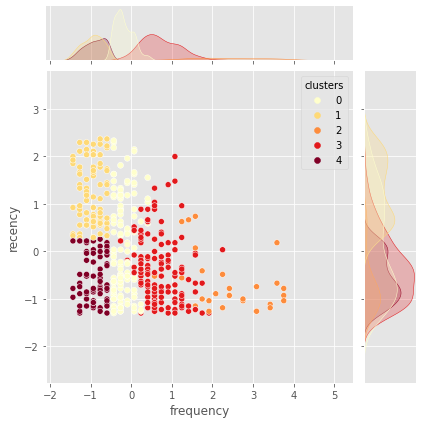

In [ ]:
sns.jointplot(x='frequency', y='recency', data=df, hue='clusters', palette='YlOrRd');

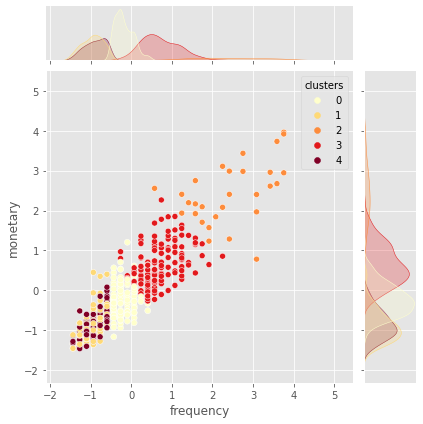

In [ ]:
sns.jointplot(x='frequency', y='monetary', data=df, hue='clusters', palette='YlOrRd');

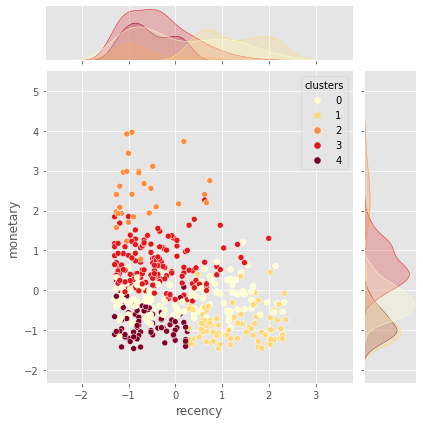

In [ ]:
sns.jointplot(x='recency', y='monetary', data=df, hue='clusters', palette='YlOrRd');

#### Fun exercise
For out plots we used only one palette that is called 'YlOrRd' - Yellow or Red, but there are many other options. See the next image with different colormaps and change the palette parameter in jointplots to check them out.
These colormaps can also be used for heatmaps and other plots.

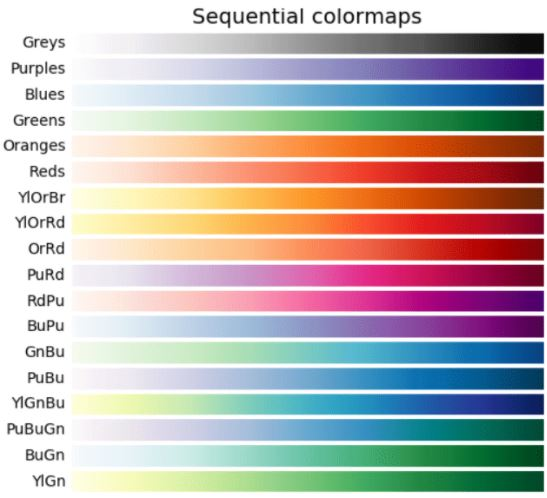

In [ ]:
from IPython.display import Image
Image(filename='colormaps.jpg')

# Ex 2
Using KMeans cluster the customers based on Frequency and add these values to our dataframe (df).

In [ ]:
#build 4 clusters for frequency and add it to the dataframe
# TODO replace '?' signs with your code

# create the model
model = ?(n_clusters=?)

# fit our data to the model
model.fit(?)

# compute clusters
df['frequencyCluster'] = model.predict(?)

print(df.?.value_counts(),'\n')
df.head()

### How to choose number of clusters?
In the previous example we defined number of clusters = 4 manually, but how to understand which number is better for a particular dataframe? It is usually the iterative process where the clusters should be manually inspected. There are also various techniques how to identify number of clusters. These methods provide you with some additional intuition (but they do not guarantee this is the best number of clusters for your problem).

* **Elbow method** is the most common technique
<img src= "https://www.linkpicture.com/q/7_113.png">

In [ ]:
# First, we create a list of different K-means models (each model has different number of clusters from 1 to 20)
model_array = [KMeans(n_clusters=i) for i in range(1, 20)]
print(len(model_array))
# and calculate scores for each model
score = [-model_array[i].fit(df).score(df) for i in range(len(model_array))]

19


In [ ]:
score

[2547.148796498906,
 1424.79057103839,
 987.7461419089951,
 675.623595943453,
 503.6375111902963,
 354.49042244924294,
 304.8955513077938,
 273.49483455752704,
 243.97759469270522,
 215.10248112088442,
 201.91819912448713,
 190.4404430582265,
 178.39685066016327,
 167.42019503041166,
 158.80087289638777,
 147.82505477782755,
 144.25113723036156,
 133.70446420615008,
 132.7088927913825]

### Result interpretation
<img src="https://www.linkpicture.com/q/8_112.png">

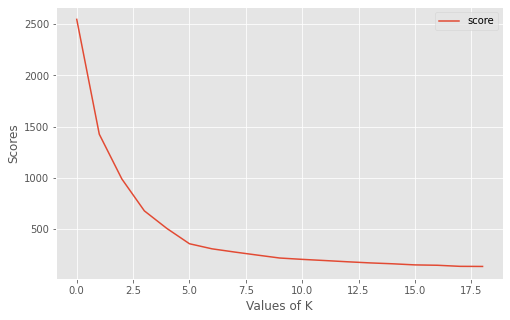

In [ ]:
# Then we create a plot and examine it
pd.DataFrame({'score': score}).plot(figsize=(8,5))
plt.xlabel('Values of K')
plt.ylabel('Scores');

To determine the optimal number of clusters, we have to select the value of k at the “elbow” ie the point after which the values start decreasing in a linear fashion.

## Hierarchical Clustering
<img src="https://www.linkpicture.com/q/9_68.png">

Hierarchical clustering means creating a tree of clusters by iteratively grouping or separating data points. There are two types of hierarchical clustering:

* Agglomerative clustering
* Divisive clustering

The Hierarchical clustering Technique can be visualized using a **Dendrogram**.

Source: See [hierarchical clustering explained](https://towardsdatascience.com/hierarchical-clustering-explained-e58d2f936323#:~:text=Clustering%20algorithms%20look%20for%20similarities,algorithms%20to%20perform%20clustering%20tasks.&text=Hierarchical%20clustering%20means%20creating%20a,grouping%20or%20separating%20data%20points.) article for more information.

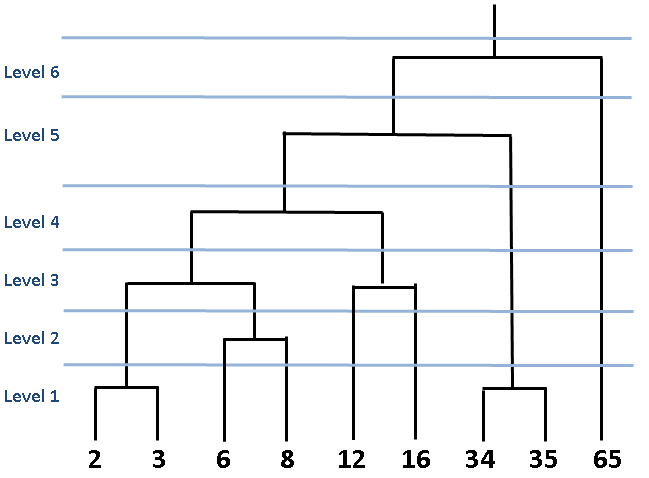

In [ ]:
from IPython.display import Image
Image(filename='dendrogram.png')

We can apply agglomerative clustering to our dataframe just to see how we can do it with sklearn

In [ ]:
# Let's take only 50 rows from the df so that dengrogram will be simpler
df = df.iloc[:50,:]
df.head()

,recency,frequency,monetary,clusters,frequencyCluster
client_id,,,,,
1,0.072265,-0.600280,-0.580571,4,3
2,-0.038806,-0.432598,-0.631537,0,0
3,-0.297971,0.405813,0.280002,3,0
4,-0.668207,0.238131,1.261693,3,0
5,-1.001419,-0.264916,-0.701316,0,0


# Ex 3
Check the the dimensionality of the DataFrame (how many rows and columns are there).

In [ ]:
# your code goes here
?

Import and use Scikit learn implementation of agglomerative clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(df)

Scikit learn does not provide dendrograms so we will use the dendrogram of [SciPy](https://docs.scipy.org/doc/scipy/reference/index.html) package.

### Results
<img src="https://www.linkpicture.com/q/10_54.png">

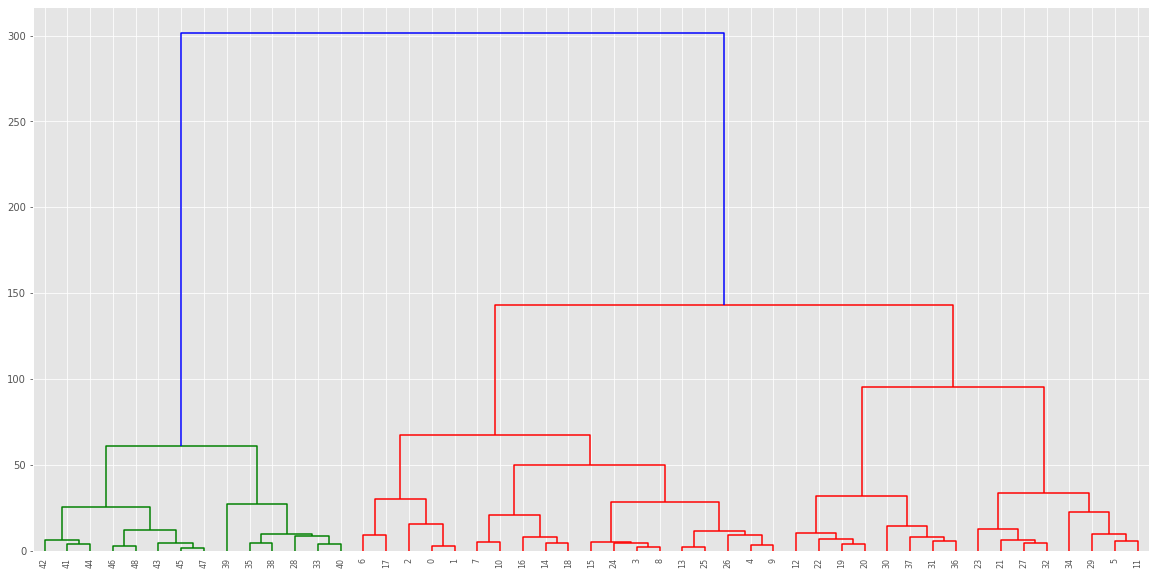

In [ ]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy

Z = hierarchy.linkage(model.children_, 'ward')

plt.figure(figsize=(20,10))
dn = hierarchy.dendrogram(Z)

## Density-based clustering (DBSCAN)

DBSCAN stands for density-based spatial clustering of applications with noise. It is able to find arbitrary shaped clusters and clusters with noise (i.e. outliers).
The main idea behind DBSCAN is that a point belongs to a cluster if it is close to many points from that cluster.

We will not take a look at DBSCAN today, but you can find and examine references by the following links:

* https://towardsdatascience.com/dbscan-clustering-explained-97556a2ad556

* https://towardsdatascience.com/dbscan-clustering-for-data-shapes-k-means-cant-handle-well-in-python-6be89af4e6ea

